**Tugas**

- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
- Buatlah model CNN untuk klasifikasi dataset MNIST.

**Modifikasi Praktikum 2**

In [ ]:
import tensorflow as tf # Library yang mendukung dalam pembelajaran mesin

from tensorflow.keras import datasets, layers, models # Datasets mendukung sekumpulan dataset yang siap digunakan. Layers mendukung pembuatan layer dalam JST, dan models berguna untuk membuat model yang digunakan dalam JST
import matplotlib.pyplot as plt # Membantu dalam memvisualisasikan data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # Memuat dataset CIFAR dan menyimpan return value di empat variabel tersebut

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0 # Normalisasi nilai setiap pixel variabel train_images dan test_images di rentang 0 dan 1

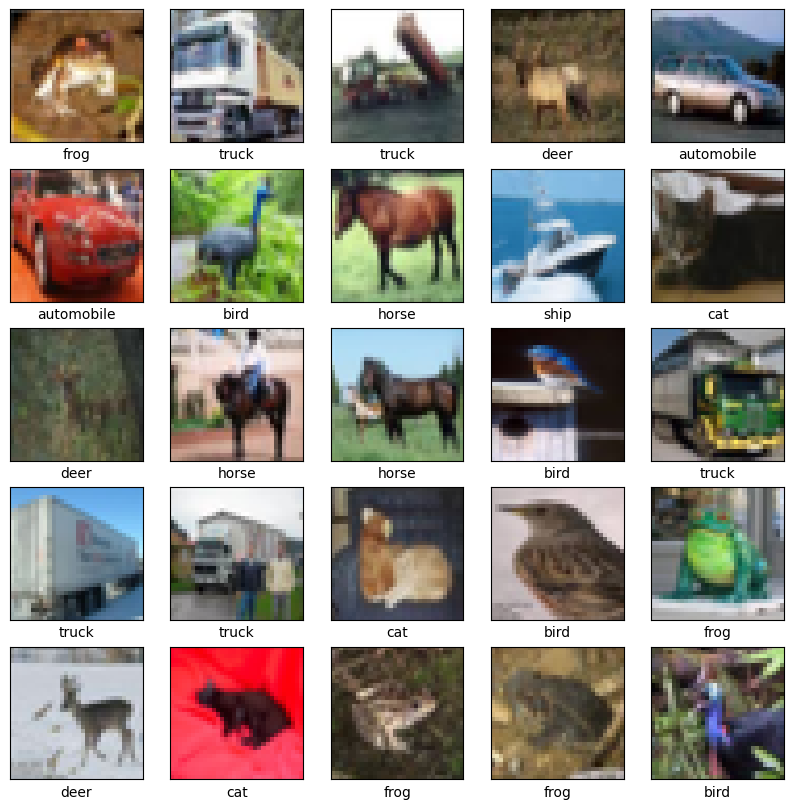

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] # Inisialisasi nama kelas untuk setiap citra yang akan ditampilkan

plt.figure(figsize=(10,10)) # mengatur ukuran figure yang ditampilkan menjadi 10 x 10 inchi
for i in range(25): # Melakukan perulangan sebanyak 25 kali
    plt.subplot(5,5,i+1) # Mengatur baris dan kolom menjadi 5 x 5
    plt.xticks([]) # Menghapus default label sumbu x
    plt.yticks([]) # Menghapus default label sumbu y
    plt.grid(False) # Tidak menampilkan grid atau petak
    plt.imshow(train_images[i]) # Menampilkan citra dari variabel train_images indeks ke-i
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]]) # Menambahkan label di sisi x (horizontal) berupa nama kelas pada citra
plt.show() # Memvisualisasikan data yang diatur sebelumnya dalam objek plt

In [ ]:
model = models.Sequential() # Membuat model Sequential

# Convolution Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same')) # Menambahkan layer convolutional 2D ke model dengan 32 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU dengan ukuran input 32 x 32 x 3 yang berupa citra RGB
# padding='same': menjaga ukuran output dari lapisan convolutional sama dengan ukuran input
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same')) # Menambahkan layer convolutional 2D ke model dengan 32 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU dengan ukuran input 32 x 32 x 3 yang berupa citra RGB
# padding='same': menjaga ukuran output dari lapisan convolutional sama dengan ukuran input
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional

# Pooling Layer
model.add(layers.MaxPooling2D((2, 2))) # Menambahkan layer Pooling 2D dengan tipe Max berukuran 2 x 2

# Dropout Layer
model.add(layers.Dropout(0.25)) # Menghapus sejumlah neuron dari model secara acak selama pelatihan (mencegah overfitting)

# Convolution Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))  # Menambahkan layer convolutional 2D ke model dengan 64 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))  # Menambahkan layer convolutional 2D ke model dengan 64 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional

# Pooling Layer
model.add(layers.MaxPooling2D((2, 2))) # Menambahkan layer Pooling 2D dengan tipe Max berukuran 2 x 2

# Dropout Layer
model.add(layers.Dropout(0.25)) # Menghapus sejumlah neuron dari model secara acak selama pelatihan (mencegah overfitting)

# Convolution Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))  # Menambahkan layer convolutional 2D ke model dengan 128 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))  # Menambahkan layer convolutional 2D ke model dengan 128 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional

# Pooling Layer
model.add(layers.MaxPooling2D((2, 2))) # Menambahkan layer Pooling 2D dengan tipe Max berukuran 2 x 2

# Dropout Layer
model.add(layers.Dropout(0.25)) # Menghapus sejumlah neuron dari model secara acak selama pelatihan (mencegah overfitting)

In [ ]:
model.summary() # Menampilkan ringkasan detail model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_19 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
# Flatten Layer
model.add(layers.Flatten()) # Menambahkan layer Flatten pada model yang digunakan untuk pemrosesan dimensi input menjadi 1 dimensi

# Full Connected Layer
model.add(layers.Dense(128, activation='relu')) # Menambah layer Dense (Full Connceted) dengan 128 neuron dan fungsi aktivasi ReLU

# Dropout Layer
model.add(layers.Dropout(0.25)) # Menghapus sejumlah neuron dari model secara acak selama pelatihan (mencegah overfitting)

# Output Layer
model.add(layers.Dense(10, activation='softmax')) # Menambah layer Dense (Full Connceted) dengan 10 neuron yang sesuai 10 kelas yang ditentukan sebelumnya
# Fungsi aktivasi softmax menghasilkan output yang merupakan probabilitas dari setiap kelas

In [ ]:
model.summary() # Menampilkan ringkasan detail model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_19 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
model.compile(optimizer='adam', # Compile Model dengan optimizer ADAM
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # Fungsi kerugian SparseCategoricalCrossentropy adalah fungsi kerugian yang digunakan untuk klasifikasi multikelas dengan tidak menerima logits atau probabilitas sebagai input
              metrics=['accuracy']) # Matrik akurasi untuk menyimpan akurasi dari kinerja model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels)) # Melatih model dengan train_images dan train_labels dengan epoch sebanyak 10 kali dan data validasi berupa test_images dan test_labels

Epoch 1/10
1563/1563 [==============================] - 20s 10ms/step - loss: 1.5075 - accuracy: 0.4616 - val_loss: 1.0718 - val_accuracy: 0.6253
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0595 - accuracy: 0.6317 - val_loss: 1.0703 - val_accuracy: 0.6326
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8881 - accuracy: 0.6925 - val_loss: 0.7606 - val_accuracy: 0.7439
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7873 - accuracy: 0.7299 - val_loss: 0.8467 - val_accuracy: 0.7207
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7114 - accuracy: 0.7590 - val_loss: 0.6356 - val_accuracy: 0.7792
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6481 - accuracy: 0.7810 - val_loss: 0.6356 - val_accuracy: 0.7842
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6017 - accuracy: 0.7968 - val_loss: 0.7115 - val_

313/313 - 1s - loss: 0.5300 - accuracy: 0.8269 - 839ms/epoch - 3ms/step


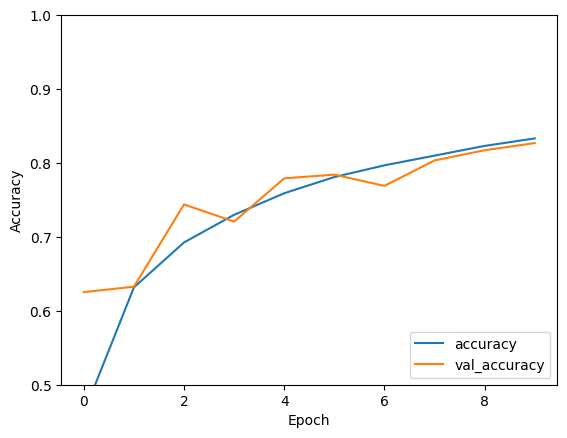

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy') # Menmabahkan history berupa label atau penanda data di legend untuk accuracy
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') # Menmabahkan history berupa label atau penanda data di legend untuk val_accuracy
plt.xlabel('Epoch') # Menambah label pada sumbu x (horizontal)
plt.ylabel('Accuracy') # Menambah label pada sumbu y (vertikal)
plt.ylim([0.5, 1]) # Panjang sumbu y
plt.legend(loc='lower right') # Mengatur posisi legend di pojok kanan bawah

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # Mengevaluasi model menggunakan test_images dan test_labels dengan nilai verbose 2 yang menentukan rincian informasi yang diberikan

In [ ]:
print(test_acc) # Menampilkan nilai variabel test_acc

0.8269000053405762


**Referensi**: [Cifar-10 Images Classification using CNNs (88%)](https://www.kaggle.com/code/faressayah/cifar-10-images-classification-using-cnns-88) - **10 November 2023**

**Klasifikasi MNIST**

In [105]:
import numpy as np # menyediakan dukungan untuk array multidimensi dan berbagai fungsi matematika
import pandas as pd # menyediakan struktur data dan fungsi operasi data

In [106]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [107]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


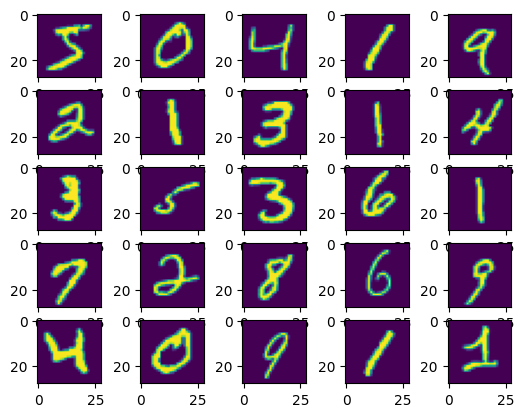

In [108]:
# plotting the first 25 images in the train set of MNIST

fig, axs = plt.subplots(5, 5)
cnt = 0
for i in range(5):
     for j in range(5):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [109]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [110]:
model = models.Sequential() # Membuat model Sequential

# Convolution Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1) , padding='same')) # Menambahkan layer convolutional 2D ke model dengan 32 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU dengan ukuran input 32 x 32 x 3 yang berupa citra RGB
# padding='same': menjaga ukuran output dari lapisan convolutional sama dengan ukuran input
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1) , padding='same')) # Menambahkan layer convolutional 2D ke model dengan 32 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU dengan ukuran input 32 x 32 x 3 yang berupa citra RGB
# padding='same': menjaga ukuran output dari lapisan convolutional sama dengan ukuran input
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional

# Pooling Layer
model.add(layers.MaxPooling2D((2, 2))) # Menambahkan layer Pooling 2D dengan tipe Max berukuran 2 x 2

# Dropout Layer
model.add(layers.Dropout(0.25)) # Menghapus sejumlah neuron dari model secara acak selama pelatihan (mencegah overfitting)

# Convolution Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1) , padding='same'))  # Menambahkan layer convolutional 2D ke model dengan 64 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1) , padding='same'))  # Menambahkan layer convolutional 2D ke model dengan 64 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional

# Pooling Layer
model.add(layers.MaxPooling2D((2, 2))) # Menambahkan layer Pooling 2D dengan tipe Max berukuran 2 x 2

# Dropout Layer
model.add(layers.Dropout(0.25)) # Menghapus sejumlah neuron dari model secara acak selama pelatihan (mencegah overfitting)

# Convolution Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1) , padding='same'))  # Menambahkan layer convolutional 2D ke model dengan 128 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1) , padding='same'))  # Menambahkan layer convolutional 2D ke model dengan 128 filter dengan ukuran 3 x 3 dan fungsi aktivasi berupa ReLU
model.add(layers.BatchNormalization()) # Normalisasi aktivasi dari lapisan convolutional

# Pooling Layer
model.add(layers.MaxPooling2D((2, 2))) # Menambahkan layer Pooling 2D dengan tipe Max berukuran 2 x 2

# Dropout Layer
model.add(layers.Dropout(0.25)) # Menghapus sejumlah neuron dari model secara acak selama pelatihan (mencegah overfitting)

In [111]:
model.summary() # Menampilkan ringkasan detail model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_36 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_37 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                     

In [112]:
# Flatten Layer
model.add(layers.Flatten()) # Menambahkan layer Flatten pada model yang digunakan untuk pemrosesan dimensi input menjadi 1 dimensi

# Full Connected Layer
model.add(layers.Dense(128, activation='relu')) # Menambah layer Dense (Full Connceted) dengan 128 neuron dan fungsi aktivasi ReLU

# Dropout Layer
model.add(layers.Dropout(0.25)) # Menghapus sejumlah neuron dari model secara acak selama pelatihan (mencegah overfitting)

# Output Layer
model.add(layers.Dense(10, activation='softmax')) # Menambah layer Dense (Full Connceted) dengan 10 neuron yang sesuai 10 kelas yang ditentukan sebelumnya
# Fungsi aktivasi softmax menghasilkan output yang merupakan probabilitas dari setiap kelas

In [113]:
model.summary() # Menampilkan ringkasan detail model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_36 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_37 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                     

In [114]:
model.compile(optimizer='adam', # Compile Model dengan optimizer ADAM
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # Fungsi kerugian SparseCategoricalCrossentropy adalah fungsi kerugian yang digunakan untuk klasifikasi multikelas dengan tidak menerima logits atau probabilitas sebagai input
              metrics=['accuracy']) # Matrik akurasi untuk menyimpan akurasi dari kinerja model

In [115]:
history = model.fit(X_train, y_train, epochs=16,
                    validation_data=(X_test, y_test)) # Melatih model dengan train_images dan train_labels dengan epoch sebanyak 10 kali dan data validasi berupa test_images dan test_labels

Epoch 1/16
1875/1875 [==============================] - 19s 8ms/step - loss: 0.2000 - accuracy: 0.9404 - val_loss: 0.0516 - val_accuracy: 0.9843
Epoch 2/16
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0762 - accuracy: 0.9786 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 3/16
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.0339 - val_accuracy: 0.9901
Epoch 4/16
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0508 - accuracy: 0.9855 - val_loss: 0.0321 - val_accuracy: 0.9911
Epoch 5/16
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0446 - accuracy: 0.9879 - val_loss: 0.0266 - val_accuracy: 0.9907
Epoch 6/16
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0385 - accuracy: 0.9888 - val_loss: 0.0367 - val_accuracy: 0.9895
Epoch 7/16
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0248 - val_ac

313/313 - 1s - loss: 0.0212 - accuracy: 0.9948 - 951ms/epoch - 3ms/step


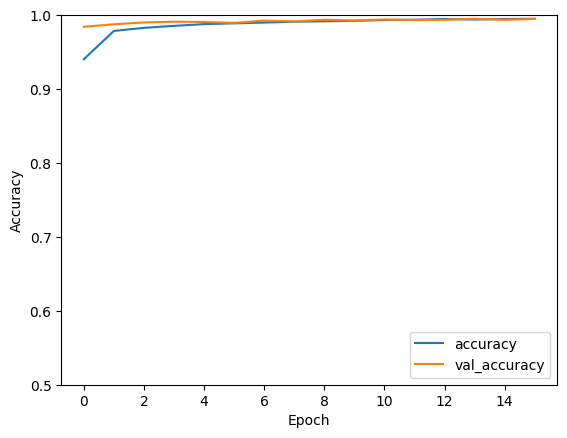

In [116]:
plt.plot(history.history['accuracy'], label='accuracy') # Menmabahkan history berupa label atau penanda data di legend untuk accuracy
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') # Menmabahkan history berupa label atau penanda data di legend untuk val_accuracy
plt.xlabel('Epoch') # Menambah label pada sumbu x (horizontal)
plt.ylabel('Accuracy') # Menambah label pada sumbu y (vertikal)
plt.ylim([0.5, 1]) # Panjang sumbu y
plt.legend(loc='lower right') # Mengatur posisi legend di pojok kanan bawah

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2) # Mengevaluasi model menggunakan test_images dan test_labels dengan nilai verbose 2 yang menentukan rincian informasi yang diberikan

In [117]:
print(test_acc) # Menampilkan nilai variabel test_acc

0.9947999715805054


In [118]:
y_pred = np.argmax(model.predict(X_test), axis=-1) # melakukan prediksi nilai berdasarkan X_test

313/313 [==============================] - 1s 2ms/step


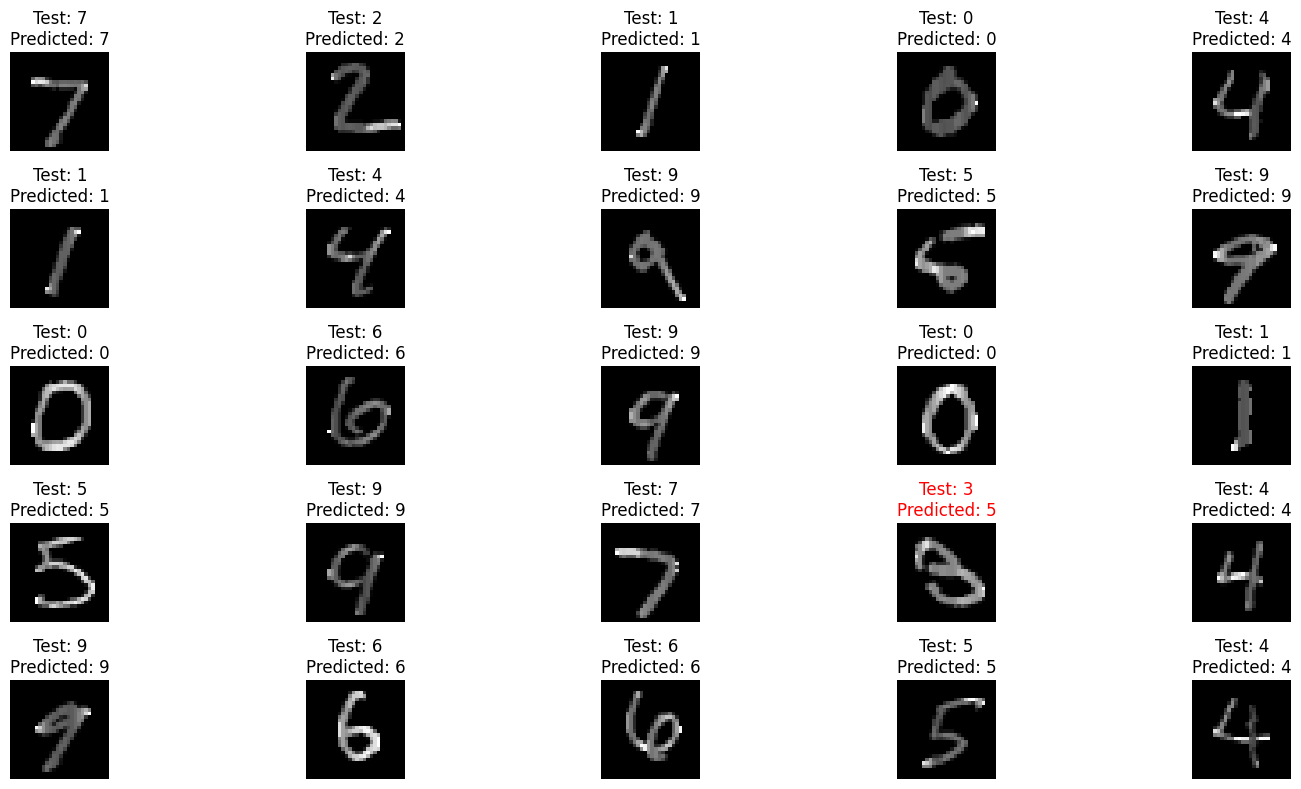

In [119]:
# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test[:n_images]
sample_labels = y_test[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred[i]}",
              color='black'
              if sample_labels[i] == y_pred[i]
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()